# 2 - Análise exploratória dos dados
## Configurações iniciais

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (15, 7))

# Importar dados

In [2]:
notas = pd.read_csv('dados/ml-latest-small/ratings.csv')
filmes = pd.read_csv('dados/ml-latest-small/movies.csv')

In [3]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Ajustando títulos do DataFrame

In [6]:
notas.columns = ['idUsuario', 'idFilme', 'nota', 'momento']
filmes.columns = ['idFilme', 'titulo', 'generos']

In [7]:
notas.head()

,idUsuario,idFilme,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
filmes.head()

,idFilme,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Trabalhando com queries

In [9]:
filmes.query('idFilme == 1')

,idFilme,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [10]:
notas.query('idFilme == 1').nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

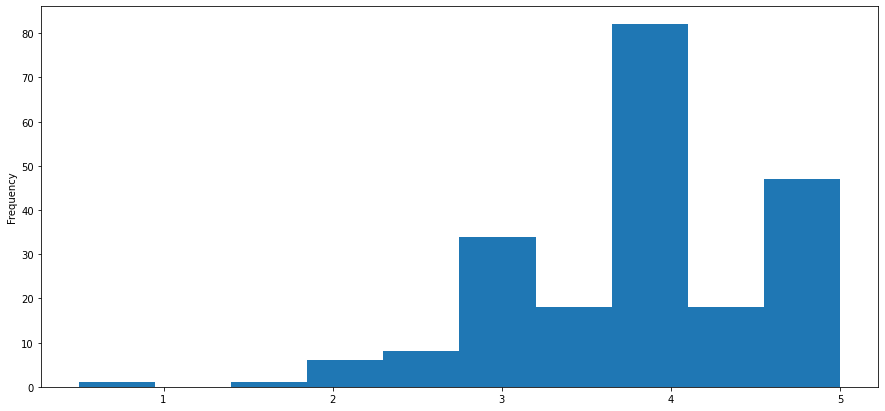

In [11]:
notas_toy_story = notas.query('idFilme == 1').nota
notas_toy_story.plot(kind='hist')

In [12]:
notas_toy_story.mean()

3.9209302325581397

{'whiskers': [<matplotlib.lines.Line2D at 0x208e0ee8c70>,
 'caps': [<matplotlib.lines.Line2D at 0x208e0ef9370>,
 'boxes': [<matplotlib.lines.Line2D at 0x208e0ee88e0>],
 'medians': [<matplotlib.lines.Line2D at 0x208e0ef9a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x208e0ef9d30>],
 'means': []}

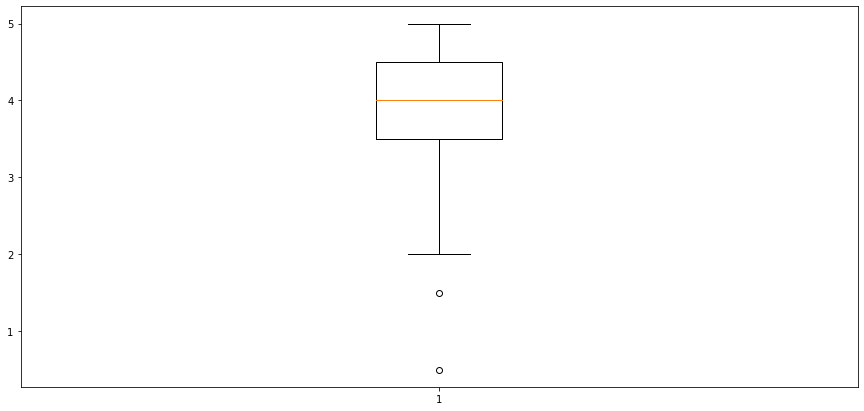

In [13]:
plt.boxplot(notas_toy_story)

{'whiskers': [<matplotlib.lines.Line2D at 0x208e1c57940>,
 'caps': [<matplotlib.lines.Line2D at 0x208e1c5f040>,
 'boxes': [<matplotlib.lines.Line2D at 0x208e1c575e0>,
 'medians': [<matplotlib.lines.Line2D at 0x208e1c5f700>,
 'fliers': [<matplotlib.lines.Line2D at 0x208e1c5fd60>,
 'means': [<matplotlib.lines.Line2D at 0x208e1c5fa00>,
  <matplotlib.lines.Line2D at 0x208e1e24580>]}

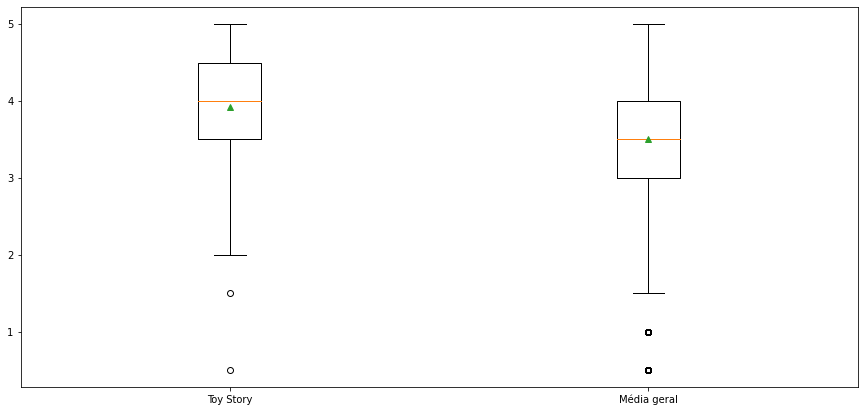

In [19]:
plt.boxplot([notas_toy_story, notas.query('idFilme != 1').nota], labels = ['Toy Story', 'Média geral'], showmeans = True)

In [20]:
notas_por_filme = notas.groupby('idFilme')
notas_por_filme

In [22]:
notas_por_filme.nota.mean()

idFilme
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [38]:
filmes.set_index('idFilme', inplace=True)
filmes

,titulo,generos
idFilme,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [41]:
filmes['media_notas'] = notas_por_filme.nota.mean()
filmes

,titulo,generos,media_notas
idFilme,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
193585,Flint (2017),Drama,3.500000


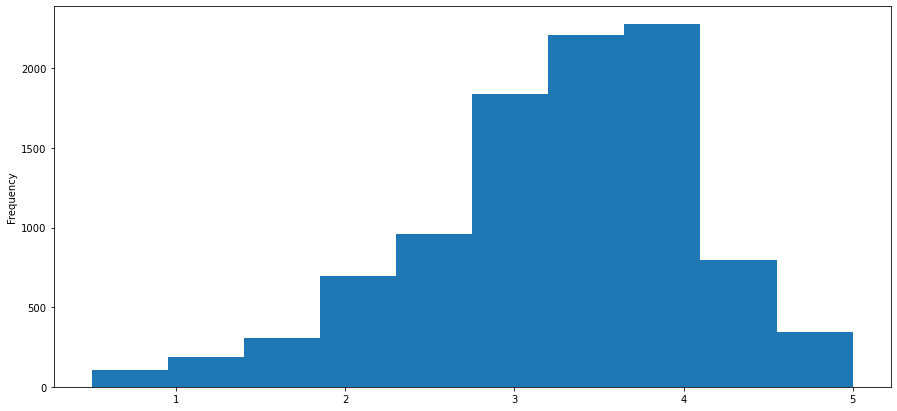

In [42]:
filmes.media_notas.plot(kind = 'hist')

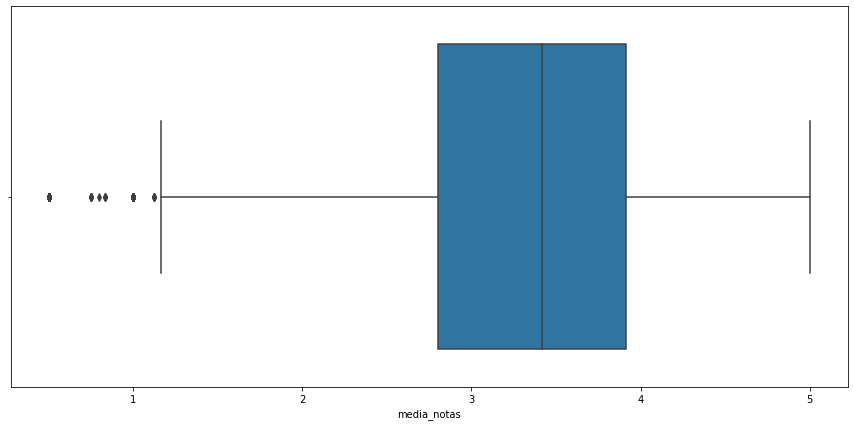

In [43]:
sns.boxplot(filmes.media_notas)

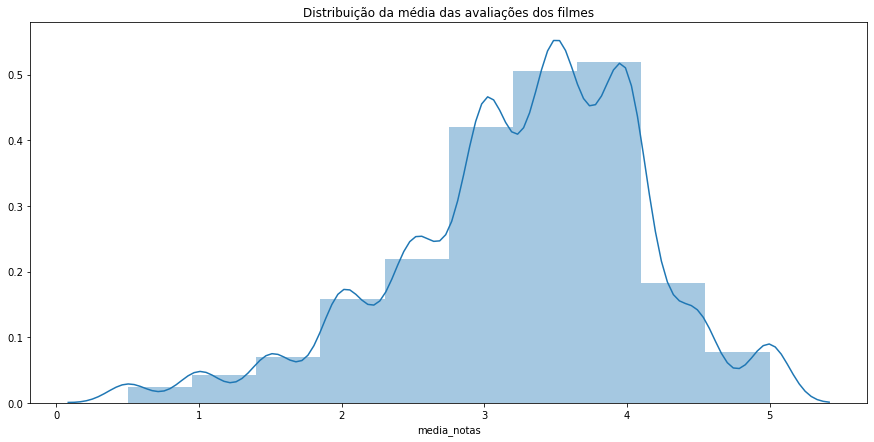

In [48]:
plt.title('Distribuição da média das avaliações dos filmes')
# Tanto pandas quanto SeaBorn usam MatPlotLib (PyPlot) por tras.
sns.distplot(filmes.media_notas, bins = 10)

idFilme
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: media_notas, Length: 9742, dtype: float64

In [53]:
nro_notas_por_filme = notas_por_filme.nota.count()
filmes['nro_avaliacoes'] = nro_notas_por_filme
filmes

,titulo,generos,media_notas,nro_avaliacoes
idFilme,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
193585,Flint (2017),Drama,3.500000,1.0


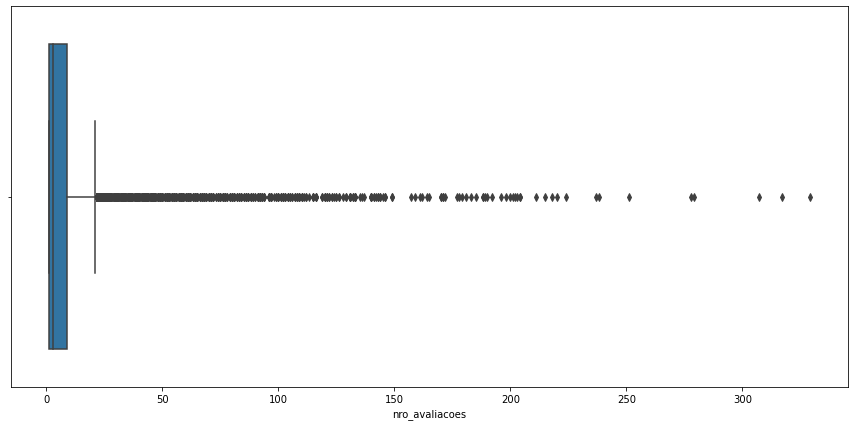

In [54]:
sns.boxplot(filmes.nro_avaliacoes)

In [55]:
nro_notas_por_filme

idFilme
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [57]:
filmes_suficientes_avaliacoes = filmes.query('nro_avaliacoes > 30')
filmes_suficientes_avaliacoes

,titulo,generos,media_notas,nro_avaliacoes
idFilme,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
6,Heat (1995),Action|Crime|Thriller,3.946078,102.0
...,...,...,...,...
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,3.833333,54.0
134130,The Martian (2015),Adventure|Drama|Sci-Fi,4.000000,48.0
134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,3.813953,43.0


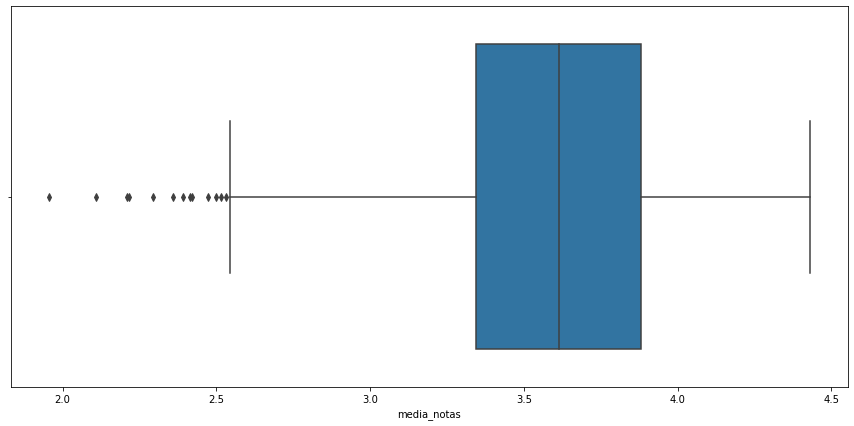

In [58]:
sns.boxplot(filmes_suficientes_avaliacoes.media_notas)

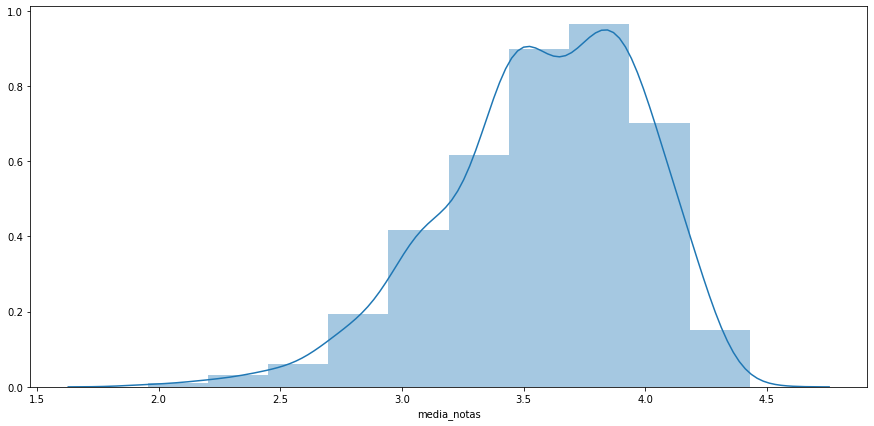

In [60]:
sns.distplot(filmes_suficientes_avaliacoes.media_notas, bins = 10)

In [61]:
print(filmes.media_notas.mean())
print(filmes_suficientes_avaliacoes.media_notas.mean())

3.2624482748109656
3.5783082952182483


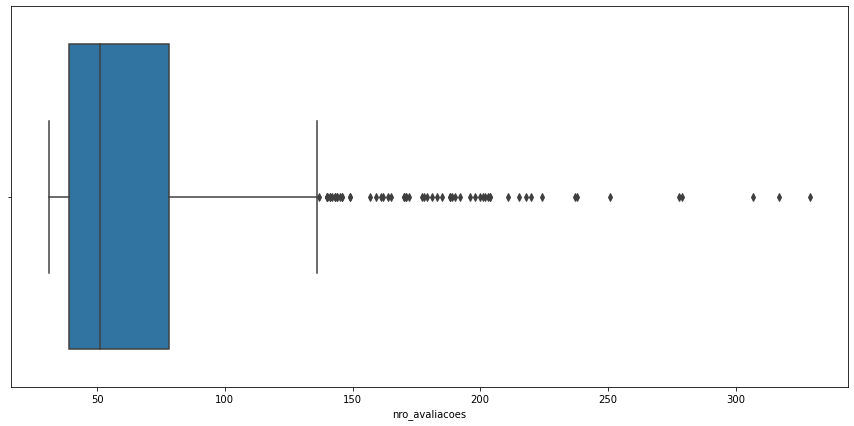

In [62]:
sns.boxplot(filmes_suficientes_avaliacoes.nro_avaliacoes)

In [77]:
notas_por_filme.groups.items()

dict_items([(1, Int64Index([    0,   516,   874,  1434,  1667,  1772,  2274,  3219,  4059,
             4879,
            ...
            95101, 95864, 96100, 97043, 97143, 97364, 98479, 98666, 99497,
            99534],
           dtype='int64', length=215)), (2, Int64Index([  560,  1026,  1773,  2275,  2977,  3220,  4060,  7422,  8791,
            10361,
            ...
            90048, 90518, 91299, 91496, 92624, 95102, 95965, 97044, 97144,
            98667],
           dtype='int64', length=110)), (3, Int64Index([    1,   561,  2276,  4930,  5875,  6316,  6430,  7423,  8511,
             9429, 10362, 14123, 15300, 15509, 18262, 18350, 22277, 22304,
            24323, 25882, 30887, 33046, 35582, 39032, 39061, 42116, 43169,
            43959, 45643, 46735, 47709, 49919, 50950, 51894, 55396, 61842,
            62296, 68657, 71258, 72920, 75426, 76229, 79297, 79994, 84604,
            84931, 85292, 90421, 90519, 91497, 92625, 98668],
           dtype='int64')), (4, Int64Index([562, 

## Salvando as alterações em outro arquivo

In [78]:
filmes_suficientes_avaliacoes.to_csv('dados/ml-latest-small/filtred_movies.csv')